## Laboratorio 1: Series de tiempo

Mario José Félix Rojas

CC: 1017261080


El siguiente dataset contiene información del precio del eur/usd desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:

In [42]:
# Librerías a implementar:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


1. Leer el dataset desde github


In [43]:
# 1. Cargue de los datos
link = 'https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv'
df = pd.read_csv(link)
df.head()

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


2. Definir como índice la columna time.

In [44]:
# 2. Definición como índice la columna time
df.set_index('time', inplace=True)
df

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,
2022-07-25 13:00:00,0,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,4995,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,4996,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,4997,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


3. Obtenga información del data frame.

In [45]:
# 3. Obtener información del data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   open                5000 non-null   float64
 2   high                5000 non-null   float64
 3   low                 5000 non-null   float64
 4   close               5000 non-null   float64
 5   tick_volume         5000 non-null   int64  
 6   spread              5000 non-null   int64  
 7   real_volume         5000 non-null   int64  
 8   MeanCloseOpen       5000 non-null   float64
 9   Diff_Close          5000 non-null   float64
 10  Diff_Open           5000 non-null   float64
 11  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8+ KB


4. Determine si hay null, nan en el data frame

Según la línea anterior, no hay nulls en el data frame. Veamos los nan

In [46]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   open                5000 non-null   float64
 2   high                5000 non-null   float64
 3   low                 5000 non-null   float64
 4   close               5000 non-null   float64
 5   tick_volume         5000 non-null   int64  
 6   spread              5000 non-null   int64  
 7   real_volume         5000 non-null   int64  
 8   MeanCloseOpen       5000 non-null   float64
 9   Diff_Close          5000 non-null   float64
 10  Diff_Open           5000 non-null   float64
 11  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8+ KB


Tampoco hay nan.

5. Emplea la notación Pascal Case y trabaja solo con la columna del precio de cierre del eur/usd.

In [47]:
# Código para realizar la notación en PascaCase:

def PascalCase(dataframe):
  newdf = dataframe.strip().title().replace("_","")
  return newdf

df_PascalCase = df.rename(mapper = PascalCase, axis="columns")
df_PascalCase.head()

,Unnamed: 0,Open,High,Low,Close,TickVolume,Spread,RealVolume,Meancloseopen,DiffClose,DiffOpen,DiffMeancloseopen
time,,,,,,,,,,,,
2022-07-25 13:00:00,0,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


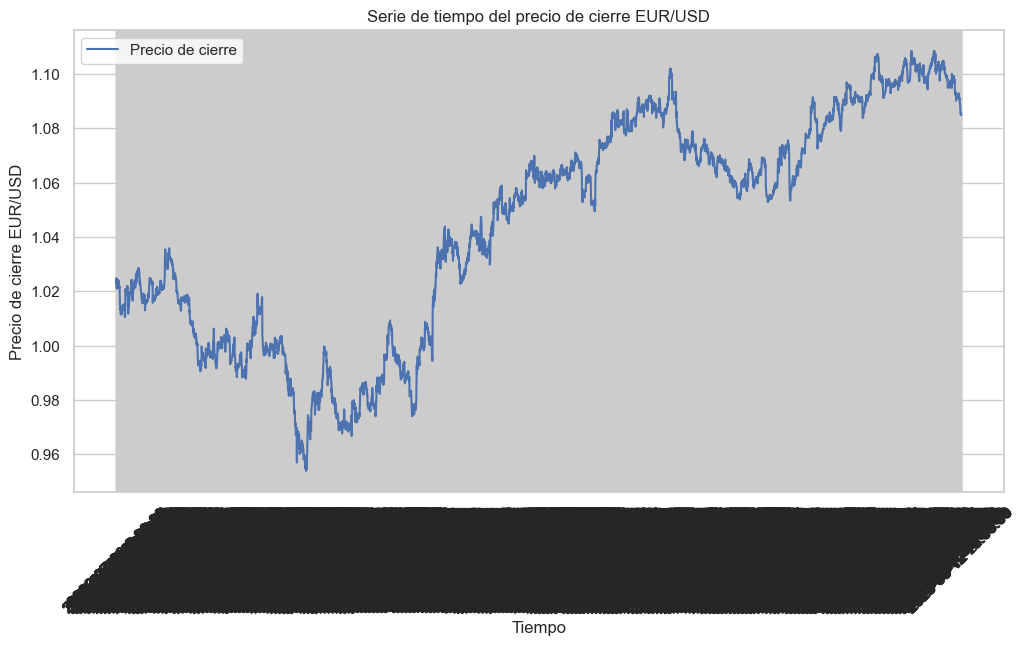

In [48]:
sns.set(style="whitegrid", rc={"figure.figsize": (12, 6)})
sns.lineplot(x=df.index, y=df_PascalCase['Close'], label='Precio de cierre')
plt.xlabel('Tiempo')
plt.xticks(rotation=45)
plt.ylabel('Precio de cierre EUR/USD')
plt.title('Serie de tiempo del precio de cierre EUR/USD')
plt.show()

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierra cada hora. 

- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.

Ya está calculada la columna, con una gráfica de diferencia.

In [53]:
# Eliminamos la primera fila:
df_PascalCase.drop(df_PascalCase.index[0], inplace=True)
df_PascalCase.head()

,Unnamed: 0,Open,High,Low,Close,TickVolume,Spread,RealVolume,Meancloseopen,DiffClose,DiffOpen,DiffMeancloseopen
time,,,,,,,,,,,,
2022-07-25 15:00:00,2,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
2022-07-25 18:00:00,5,1.02181,1.02229,1.02057,1.02099,4755,8,0,1.021400,-0.00082,-0.00304,-0.001930
2022-07-25 19:00:00,6,1.02099,1.02248,1.02062,1.02211,2438,8,0,1.021550,0.00112,-0.00082,0.000150


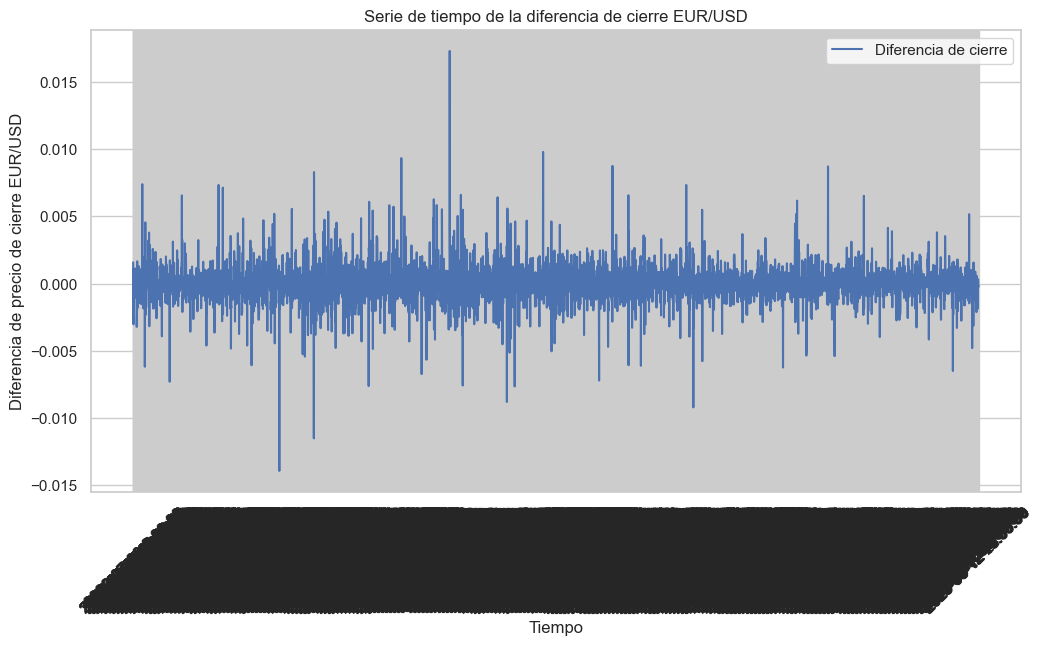

In [54]:
sns.lineplot(x=df_PascalCase.index, y=df_PascalCase['DiffClose'], label='Diferencia de cierre')
plt.xlabel('Tiempo')
plt.ylabel('Diferencia de precio de cierre EUR/USD')
plt.xticks(rotation=45)
plt.title('Serie de tiempo de la diferencia de cierre EUR/USD')
plt.show()

- Para la nueva columna construya un histograma de los datos.

<Figure size 1200x600 with 0 Axes>

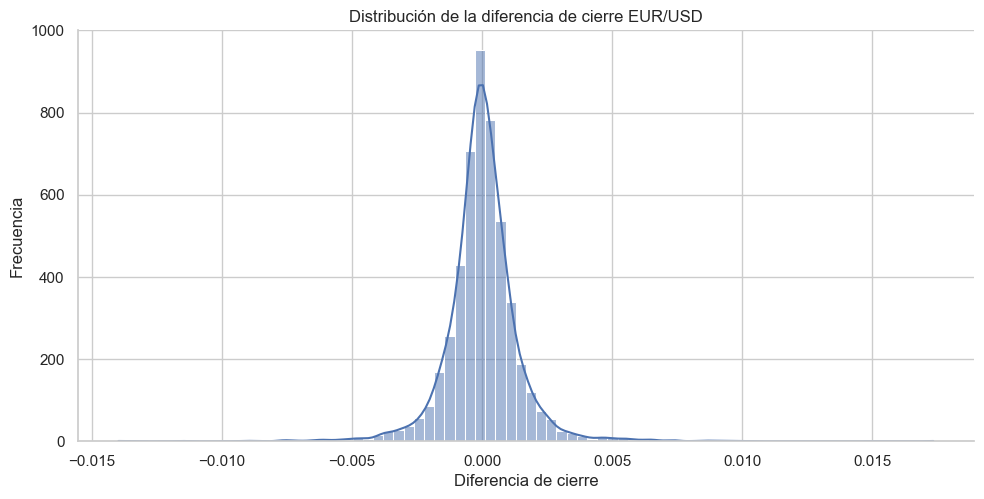

In [55]:
plt.figure(figsize=(12, 6))
sns.displot(df_PascalCase['DiffClose'], bins=80, kde=True, aspect=2)
plt.title('Distribución de la diferencia de cierre EUR/USD')
plt.xlabel('Diferencia de cierre')
plt.ylabel('Frecuencia')
plt.show()

- Determine la mejor distribucion estadística que se ajusta al histograma anterior.

2025-08-01 14:31:51.024 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=106666.325256)
2025-08-01 14:31:51.205 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=921920.970611)
2025-08-01 14:31:51.291 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=106423.227102)
2025-08-01 14:31:51.308 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=106584.663313)
2025-08-01 14:31:51.343 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted burr distribution with error=721631.791537)


(10586.927197423938,
 20893.86293751924,
 -0.17684829195088003,
 0.5259033835345359)

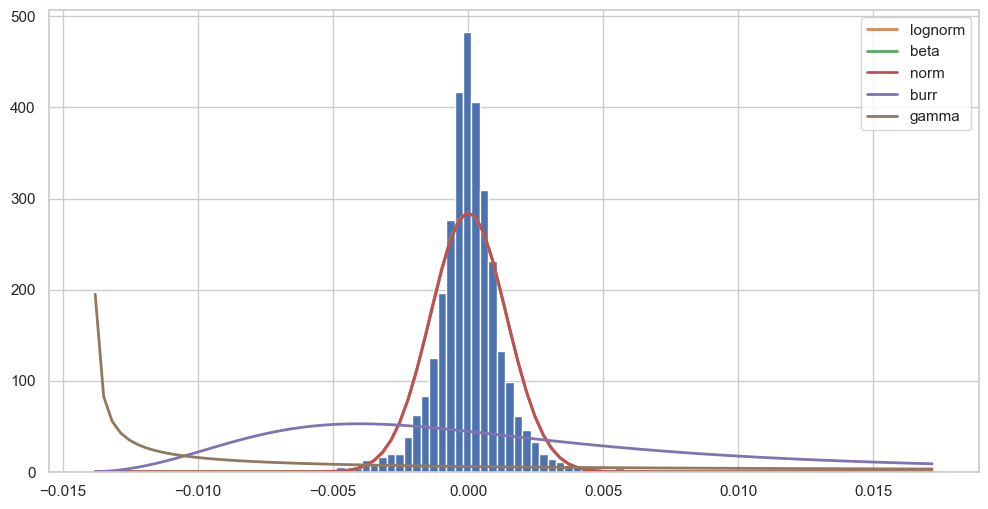

In [56]:
from fitter import Fitter


f = Fitter(df_PascalCase['DiffClose'], distributions=['gamma', 
                                            'lognorm',
                                            'beta', 
                                            'burr', 
                                            'norm'])
f.fit()
f.summary()
# Identificamos parámetros de la distribución beta:
f.fitted_param['beta']

In [ ]:
# Identificamos la mejor distribución con el error cuadrático medio.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.009509964461157715,
  'loc': -0.14716930082349705,
  'scale': 0.14717494036949658}}

Según fitter get best, la distribución que mejor se ajusta al conjunto de datos es lognormal.

7. Para el data frame, seleccionemos solo los datos del 2023.

In [58]:
df_PascalCase.index = pd.to_datetime(df_PascalCase.index) # Convertimos el índice a tipo datetime

df_2023 = df_PascalCase.loc['2023'] # Filtramos el DataFrame para obtener solo los datos del año 2023
df_2023 

,Unnamed: 0,Open,High,Low,Close,TickVolume,Spread,RealVolume,Meancloseopen,DiffClose,DiffOpen,DiffMeancloseopen
time,,,,,,,,,,,,
2023-01-02 00:00:00,2722,1.06998,1.07061,1.06795,1.06796,98,57,0,1.068970,-0.00200,-0.00063,-0.001315
2023-01-02 01:00:00,2723,1.06847,1.06965,1.06847,1.06965,91,183,0,1.069060,0.00169,-0.00151,0.000090
2023-01-02 02:00:00,2724,1.06965,1.07060,1.06904,1.07058,325,11,0,1.070115,0.00093,0.00118,0.001055
2023-01-02 03:00:00,2725,1.07058,1.07075,1.06837,1.06896,271,26,0,1.069770,-0.00162,0.00093,-0.000345
2023-01-02 04:00:00,2726,1.06895,1.06896,1.06799,1.06880,137,78,0,1.068875,-0.00016,-0.00163,-0.000895
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,4995,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,4996,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,4997,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 día, 2 días, 1 mes, etc. Determina el promedio con una periodicidad de 15 días, con una periodicidad de 1 semana y una periodicidad de 1 mes.

In [59]:
mean_7D = df_2023.groupby(pd.Grouper(freq='7d')).mean() # Calculamos la media de cada 7 días
mean_15D = df_2023.groupby(pd.Grouper(freq='15d')).mean() # Calculamos la media de cada 15 días
mean_30D = df_2023.groupby(pd.Grouper(freq='30d')).mean() # Calculamos la media de cada 30 días

mean_7D.head()

,Unnamed: 0,Open,High,Low,Close,TickVolume,Spread,RealVolume,Meancloseopen,DiffClose,DiffOpen,DiffMeancloseopen
time,,,,,,,,,,,,
2023-01-02,2781.5,1.060026,1.060999,1.059065,1.059972,3606.366667,11.341667,0.0,1.059999,-0.000047,-0.000050,-0.000049
2023-01-09,2901.5,1.075837,1.076790,1.074993,1.076002,3643.375000,9.141667,0.0,1.075920,0.000156,0.000156,0.000156
2023-01-16,3021.5,1.082021,1.082941,1.081192,1.082041,3450.716667,9.091667,0.0,1.082031,0.000020,0.000020,0.000020
2023-01-23,3141.5,1.088411,1.089192,1.087631,1.088414,2863.625000,8.941667,0.0,1.088412,0.000010,0.000007,0.000009
2023-01-30,3261.5,1.089315,1.090211,1.088410,1.089281,3306.150000,8.900000,0.0,1.089298,-0.000062,-0.000060,-0.000061


9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes. Para ello puedo emplear el metodo groupby. Notetese que si no realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo


In [63]:
df_month_2023 = df_2023.groupby(pd.Grouper(freq='ME')) # Agrupamos por mes 

for month, group in df_month_2023:
    print(f"Mes: {month.strftime('%Y-%m')}")
    print(group.head())
    print("\n")

Mes: 2023-01
                     Unnamed: 0     Open     High      Low    Close  \
time                                                                  
2023-01-02 00:00:00        2722  1.06998  1.07061  1.06795  1.06796   
2023-01-02 01:00:00        2723  1.06847  1.06965  1.06847  1.06965   
2023-01-02 02:00:00        2724  1.06965  1.07060  1.06904  1.07058   
2023-01-02 03:00:00        2725  1.07058  1.07075  1.06837  1.06896   
2023-01-02 04:00:00        2726  1.06895  1.06896  1.06799  1.06880   

                     TickVolume  Spread  RealVolume  Meancloseopen  DiffClose  \
time                                                                            
2023-01-02 00:00:00          98      57           0       1.068970   -0.00200   
2023-01-02 01:00:00          91     183           0       1.069060    0.00169   
2023-01-02 02:00:00         325      11           0       1.070115    0.00093   
2023-01-02 03:00:00         271      26           0       1.069770   -0.00162   
202

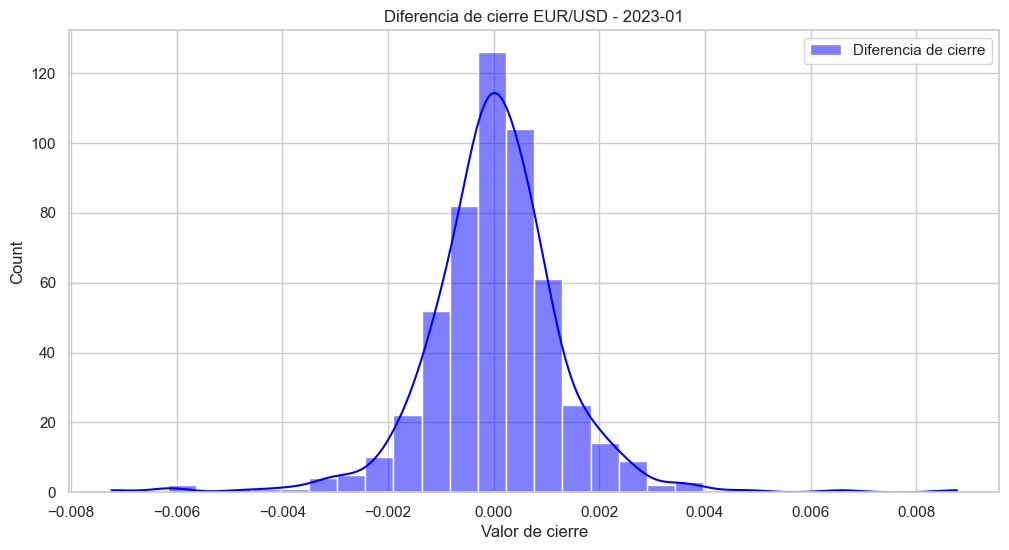

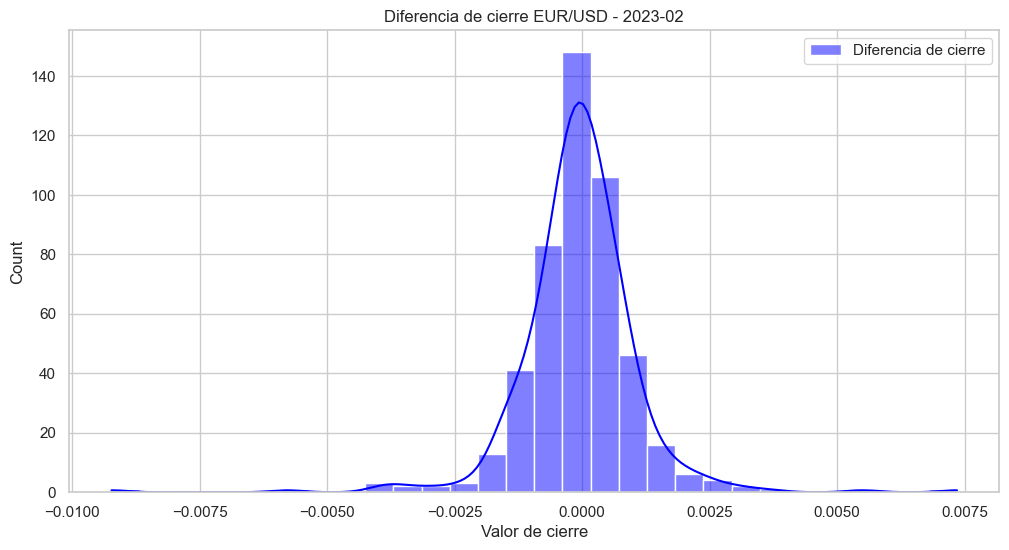

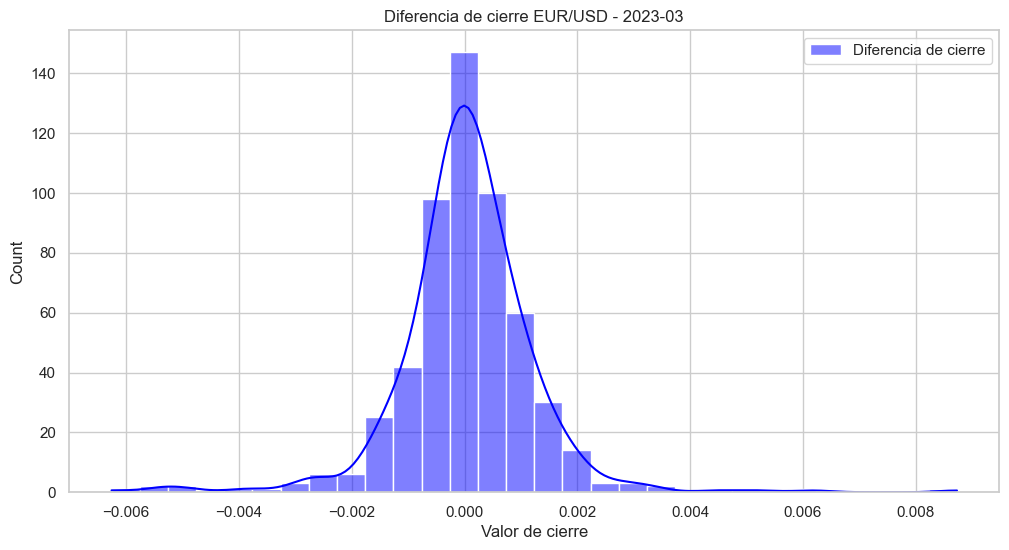

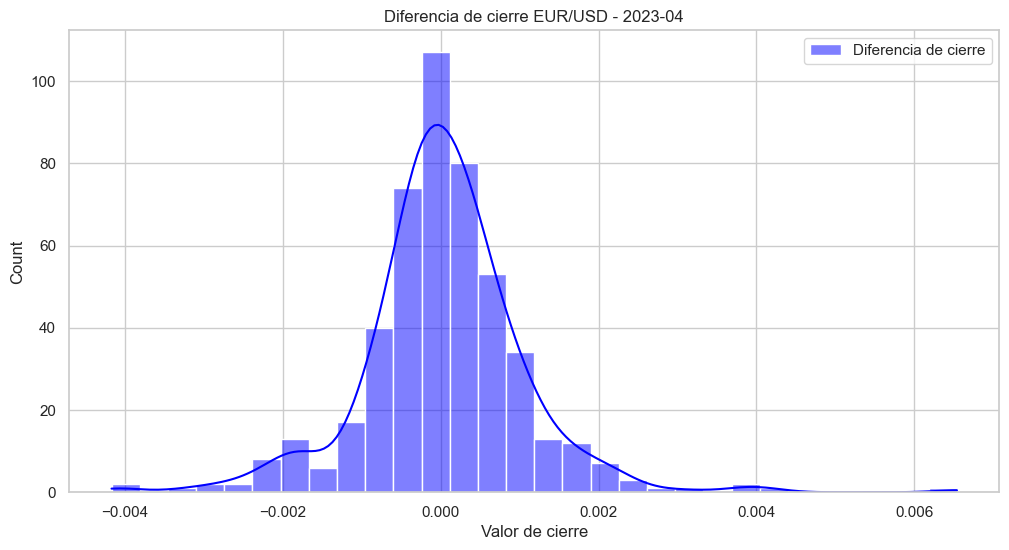

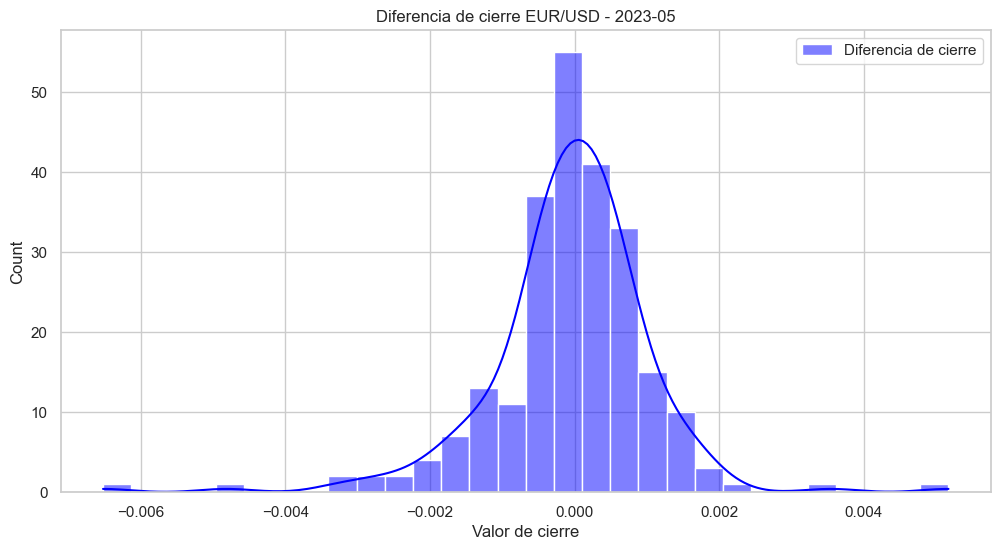

In [64]:
for month, group in df_month_2023:
    plt.figure(figsize=(12, 6))
    sns.histplot(group['DiffClose'], bins=30, kde=True, label='Diferencia de cierre', color='blue')
    plt.title(f'Diferencia de cierre EUR/USD - {month.strftime("%Y-%m")}')
    plt.xlabel('Valor de cierre')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

### Análisis de datos con pandas:

Para el siguiente dataset realizar lo siguiente:

1. Leer los datos desde una página web. Siguiendo las instrucciones de la misma página web, primero se instala la librería

In [65]:
pip install -q ucimlrepo


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [66]:
from ucimlrepo import fetch_ucirepo 

Se hace el cargue de los datos:

In [69]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

type(X), type(y)    

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [70]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


2. Renombrar las columnas en formato PascalCase.

In [71]:
dfX = X.copy()  # Se crea una copia del DataFrame para evitar modificar el original
# Se renombran las columnas para que tengan un formato más limpio
dfX.rename(columns=lambda s: s.strip().title().replace('_', ''), inplace=True)
dfX.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


3. Utilizar los métodos head(), tail(), describe() e info() para obtener información sobre el DataFrame

In [72]:
# Haciendolo un análisis exploratorio de los datos en el DataFrame dfX:
dfX.describe()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [73]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

In [74]:
dfX.tail()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [75]:
dfX.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [76]:
# Realizamos exploración del DataFrame dfY:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [77]:
y.tail()

,Diagnosis
564,M
565,M
566,M
567,M
568,B


In [78]:
y.describe()

,Diagnosis
count,569
unique,2
top,B
freq,357


In [79]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diagnosis  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


4. Contabilizar la cantidad de valores nulos (null o NaN) en el DataFrame. Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

In [80]:
nansX = dfX.isna().sum().sum()
nansY = y.isna().sum().sum()

nullsX = dfX.isnull().sum().sum()
nullsY = y.isnull().sum().sum()

print(f"Total NaNs en dfX: {nansX}, Total NaNs en y: {nansY}")
print(f"Total nulls en dfX: {nullsX}, Total nulls en y: {nullsY}")  

Total NaNs en dfX: 0, Total NaNs en y: 0
Total nulls en dfX: 0, Total nulls en y: 0


5. Identificar los valores únicos en la columna target que representan las etiquetas B y M (Benigno y Maligno, respectivamente). Utiliza el método unique() para mostrar estos valores.

In [81]:
y.Diagnosis.unique()

array(['M', 'B'], dtype=object)

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería seaborn y el método countplot()

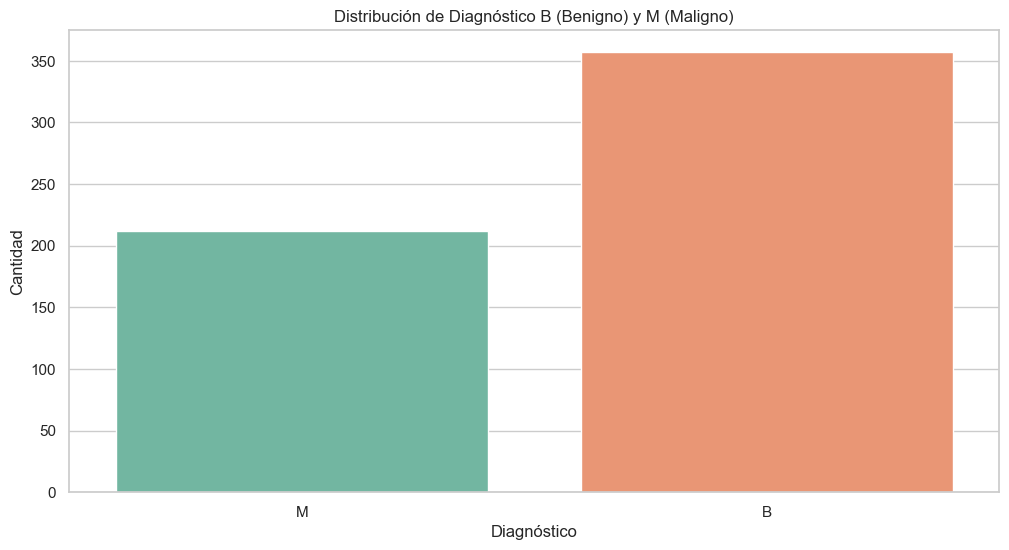

In [82]:
sns.countplot(data=y, x='Diagnosis',hue='Diagnosis', palette='Set2')
plt.title('Distribución de Diagnóstico B (Benigno) y M (Maligno)')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.show()

7. Agregar una nueva columna llamada DiagnosticNumeric donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno)

In [83]:
dfY = y.copy()  # Se crea una copia del DataFrame para evitar modificar el original
dfY['DiagnosisBin'] = dfY['Diagnosis'].map({'B': 0, 'M': 1})  # Convertimos B a 0 y M a 1
dfY.head()

,Diagnosis,DiagnosisBin
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:
$ \frac{x- mean(x)}{ \text{std}(x)}$

In [110]:
def norm(x):
    return (x - x.mean()) / np.std(x)

dfX_norm = dfX.apply(norm)  # Normalizamos todas las columnas del DataFrame dfX
dfX_norm.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


9. Agrupar características similares y calcular su promedio. Para las características:

['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]

Usa expresiones regulares para identificar patrones comunes, como radius1, radius2,radius3, etc., y calcular los promedios. Por ejemplo:

re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
También puedes utilizar el método startswith() para buscar estos patrones en los nombres de las columnas.

In [115]:
from collections import defaultdict
import re 
features = dfX_norm.columns.tolist()  # Obtenemos los nombres de las columnas normalizadas

grupos = defaultdict(list)  # Creamos un diccionario para agrupar las características
for col in features:
    match = re.match(r'^[a-zA-Z]+', col)  # Buscamos el prefijo alfanumérico
    if match:
        prefix = match.group(0) # Obtenemos el prefijo alfanumérico
        grupos[prefix].append(col)  # Agrupamos las características por prefijo

# Promedio 

for prefix, cols in grupos.items():
    dfX_norm[f'{prefix}_Mean'] = dfX_norm[cols].mean(axis=1)  # Calculamos el promedio de las columnas agrupadas


df_group_by_means = dfX_norm[[col for col in dfX_norm.columns if col.endswith('_Mean')]]
df_means = df_group_by_means.rename(mapper = PascalCase, axis="columns")  # Renombramos las columnas a PascalCase
df_means.head()



,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavepointsMean,SymmetryMean,FractaldimensionMean
0,1.824496,-1.332631,2.135522,1.824397,0.887384,2.405680,1.828809,1.829790,2.038965,1.699948
1,1.378334,-0.533026,1.161469,1.513866,-0.602642,-0.536814,-0.203792,0.631797,-0.349316,-0.228969
2,1.440145,-0.115957,1.254969,1.398835,0.390871,0.983610,0.810510,1.805686,0.776325,0.032314
3,-0.241333,0.092436,-0.185344,-0.534288,2.455843,3.346862,1.575001,1.580833,4.548702,3.964480
4,1.439805,-1.136277,1.462767,1.412437,0.661332,0.059142,0.937554,1.100652,-0.413002,-0.153407


10. Crear un gráfico donde se muestre el histograma de la columna RadiusMean separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

In [ ]:
# Concatenamos los DataFrames de medias y etiquetas
df_total = pd.concat([df_means, dfY], axis=1)  # Concatenamos los DataFrames de medias y etiquetas
df_total.head()

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavepointsMean,SymmetryMean,FractaldimensionMean,Diagnosis,DiagnosisBin
0,1.824496,-1.332631,2.135522,1.824397,0.887384,2.405680,1.828809,1.829790,2.038965,1.699948,M,1
1,1.378334,-0.533026,1.161469,1.513866,-0.602642,-0.536814,-0.203792,0.631797,-0.349316,-0.228969,M,1
2,1.440145,-0.115957,1.254969,1.398835,0.390871,0.983610,0.810510,1.805686,0.776325,0.032314,M,1
3,-0.241333,0.092436,-0.185344,-0.534288,2.455843,3.346862,1.575001,1.580833,4.548702,3.964480,M,1
4,1.439805,-1.136277,1.462767,1.412437,0.661332,0.059142,0.937554,1.100652,-0.413002,-0.153407,M,1


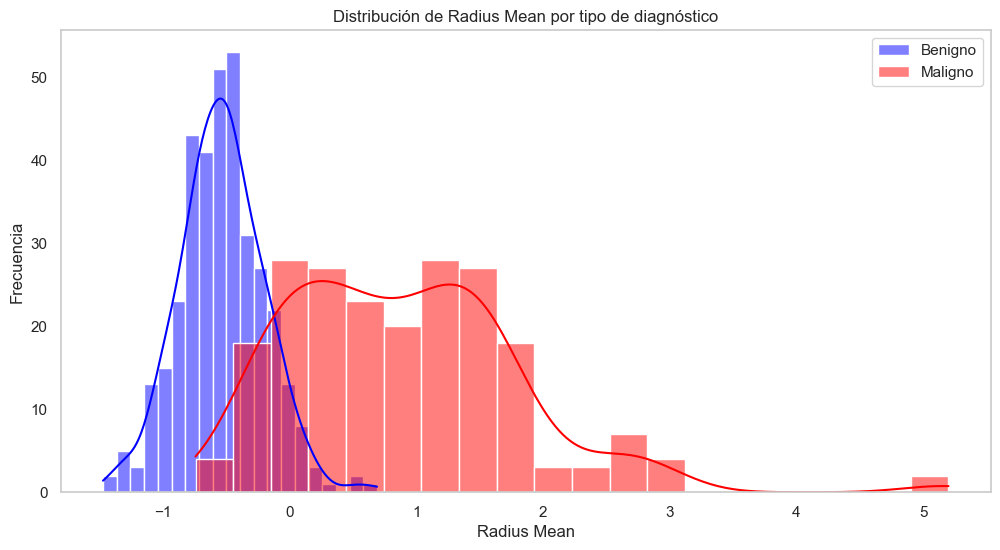

In [118]:
# Los clasificamos según el tipo de tumor:
RadiusMean_B = df_total[df_total['Diagnosis'] == 'B']['RadiusMean']
RadiusMean_M = df_total[df_total['Diagnosis'] == 'M']['RadiusMean']

plt.figure(figsize=(12, 6))
sns.histplot(RadiusMean_B, bins=20, kde=True, label='Benigno', color='blue')
sns.histplot(RadiusMean_M, bins=20, kde=True, label='Maligno', color='red')
plt.title('Distribución de Radius Mean por tipo de diagnóstico')
plt.xlabel('Radius Mean')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid()
plt.show()

11. Generar gráficos de violín para múltiples características. Para las columnas:

- RadiusMean
- TextureMean
- PerimeterMean
- AreaMean
- SmoothnessMean
- CompactnessMean
- ConcavityMean
- ConcavePointsMean
- Symmetry3
- FractalDimension3

Realiza un gráfico múltiple tipo violín, como en el esiguiente ejemplo:

data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", 

var_name="features", value_name="value")

sns.violinplot(x="features", y="value", hue="Diagnosis", data=data,

 split=True, inner="quart")
plt.xticks(rotation=45)



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'RadiusMean'),
  Text(1, 0, 'TextureMean'),
  Text(2, 0, 'PerimeterMean'),
  Text(3, 0, 'AreaMean'),
  Text(4, 0, 'SmoothnessMean'),
  Text(5, 0, 'CompactnessMean'),
  Text(6, 0, 'ConcavityMean'),
  Text(7, 0, 'ConcavepointsMean'),
  Text(8, 0, 'SymmetryMean'),
  Text(9, 0, 'FractaldimensionMean')])

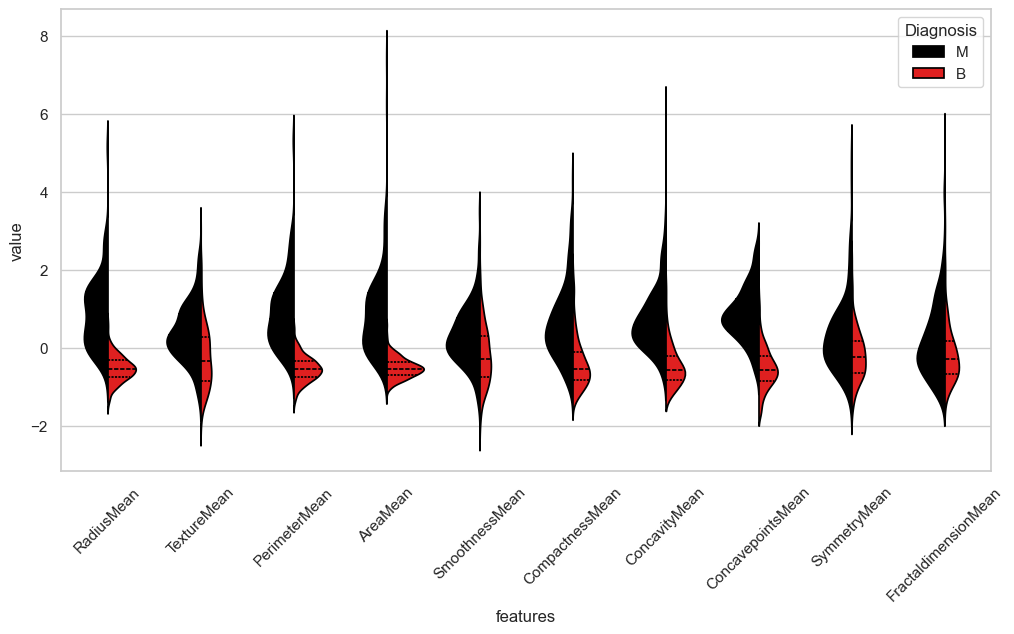

In [124]:
cols_ = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 
                'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 
                'ConcavepointsMean', 'SymmetryMean', 'FractaldimensionMean']

data = pd.melt(df_total.iloc[:, 0:11], id_vars="Diagnosis", var_name="features", value_name="value",value_vars=cols_)
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, palette={'B': 'red', 'M': 'black'}, inner='quart')
plt.xticks(rotation=45)

12. Determinar y eliminar los valores atípicos (outliers) en la columna RadiusMean.

Para identificarlos, construye un gráfico tipo boxplot:

df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
Otra alternativa es utilizar el puntaje Z para detectar outliers:

df = df[(np.abs(stats.zscore(df['edad'])) < 3)]

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

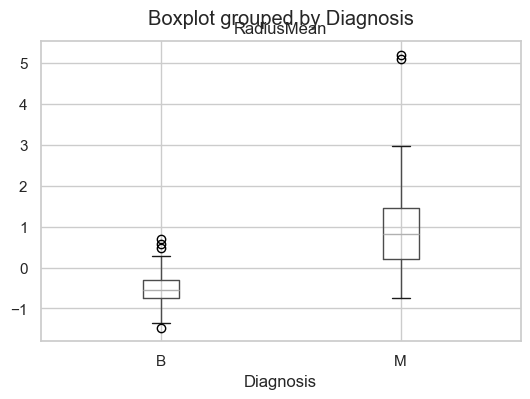

In [127]:
#Visualizar los outliers
df_total.boxplot(column='RadiusMean', by='Diagnosis',figsize=(6,4))

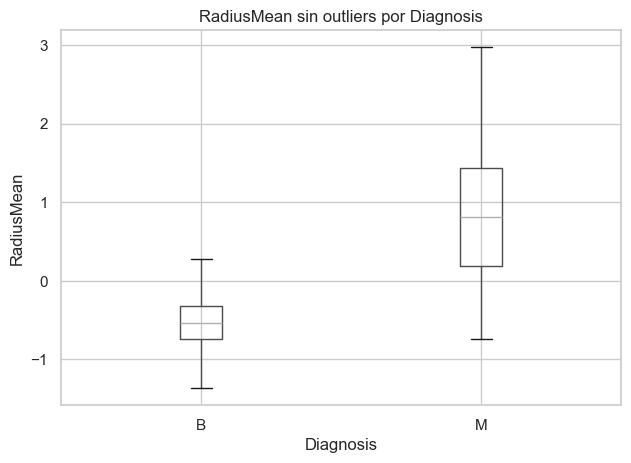

In [129]:
#Eliminando los outliers:

# 1) Calcular Q1, Q3 e IQR por grupo de Diagnosis
Q1 = df_total.groupby('Diagnosis')['RadiusMean'].transform(lambda x: x.quantile(0.25))
Q3 = df_total.groupby('Diagnosis')['RadiusMean'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

# 2) Máscara para filtrar valores dentro de los límites [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
mask = df_total['RadiusMean'].between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

# 3) DataFrame sin outliers
df_tumores_withoutliers = df_total[mask]

# 4) Boxplot resultante
df_tumores_withoutliers.boxplot(
    column='RadiusMean',
    by='Diagnosis',
    sym='k.',
    figsize=(7,5)
)
plt.suptitle('')  # Quita el título automático
plt.title('RadiusMean sin outliers por Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('RadiusMean')
plt.show()

13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

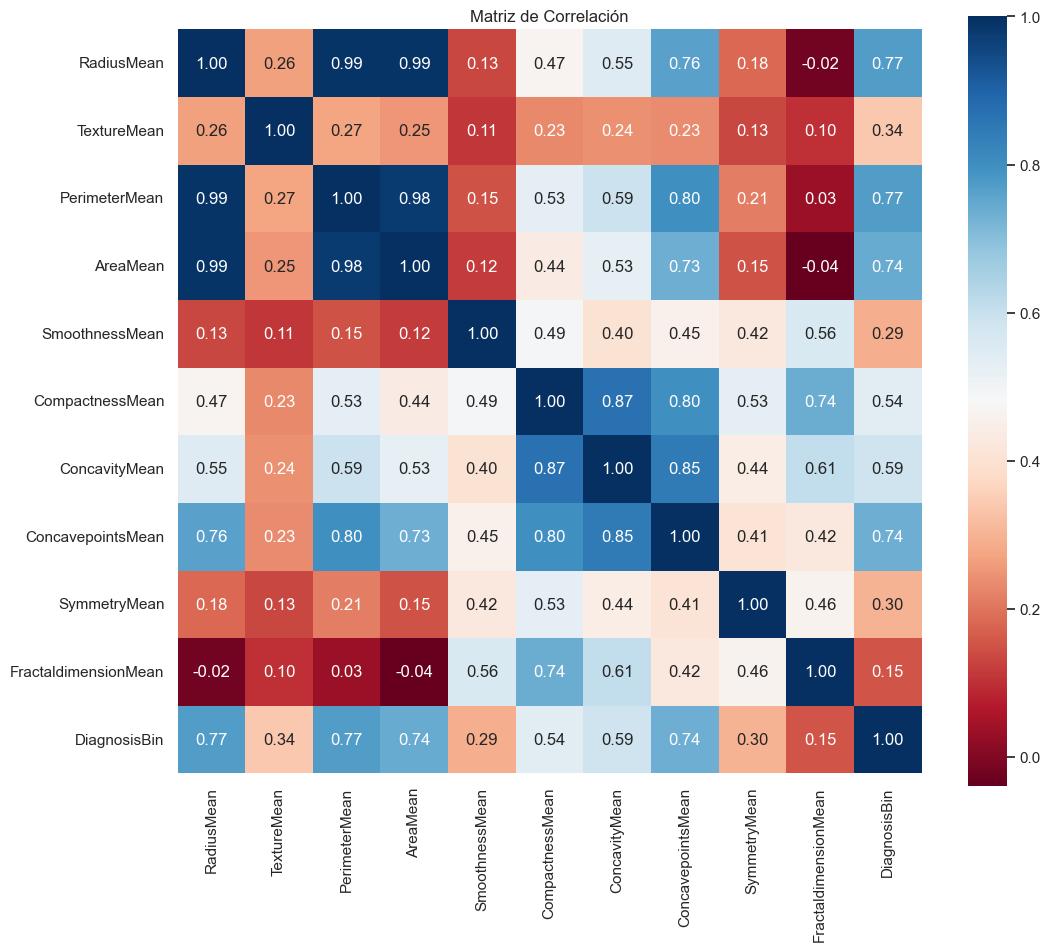

In [ ]:
correlation_matrix= df_tumores_withoutliers.corr(numeric_only=True) 

plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f", square=True)
plt.title("Matriz de Correlación")
plt.show()

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

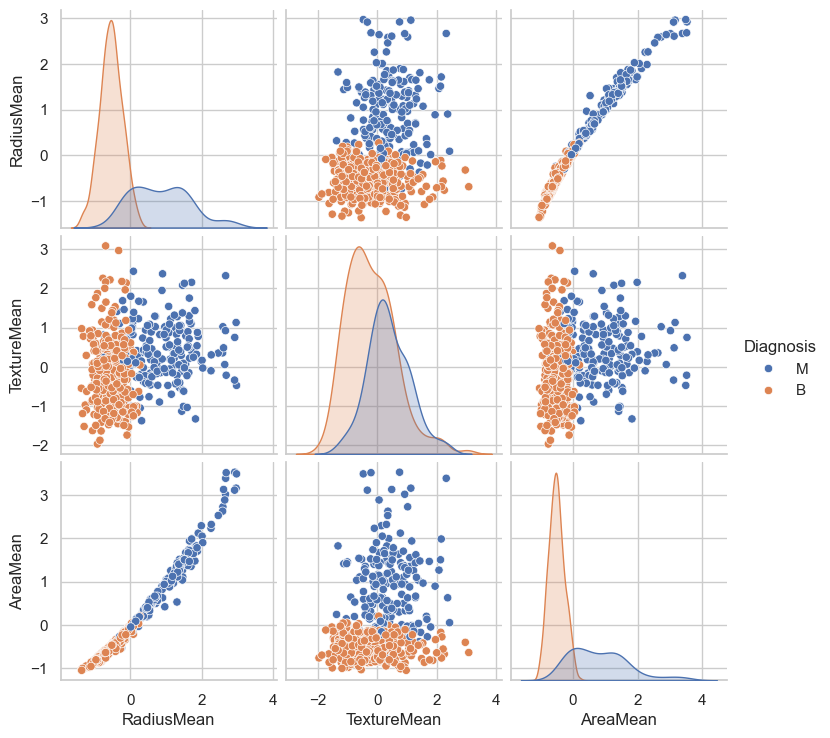

In [133]:
# Gráfico de dispersión:
sns.pairplot(df_tumores_withoutliers[['RadiusMean', 'TextureMean', 'AreaMean', 'Diagnosis']], hue='Diagnosis')
plt.show()